In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

UNCLASSIFIED = False
NOISE = -1

In [2]:
def _dist(p,q):
    dis = np.linalg.norm(p-q)
    #用函數計算距離
    return dis

In [3]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    if _dist(p,q) <= eps:
        return True
    else:
        return False
    #如果兩點距離在eps之下 兩點才是鄰居

In [4]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    for i in range(n_points):
        if _eps_neighborhood(m[:,i],m[:,point_id],eps):
            seeds.append(i)
    return seeds
    #所有點都找出來確認是不是point_id的鄰居 是的話就把那個點的index傳到seeds裡面

In [5]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    seed = _region_query(m, point_id, eps)
    #先找出所有鄰居的index
    if len(seed) < min_points:
        for i in seed:
            if classifications[i] == False:
                classifications[i] = NOISE
        return False
    #如果point_id不是core的話 把point_id的鄰居標記成noise 記得要注意原本的點是不是有cluster_id 不然會被覆蓋掉
    #舉例來說 原本a點是屬於cluster 2 然後a又是屬於b點的鄰居 但b不是core 因為a原本已經被分類了 所以a不是noise
    else:
        for i in seed:
            if classifications[i] == False or classifications[i] == NOISE:
                classifications[i] = cluster_id
                _expand_cluster(m, classifications, i, cluster_id, eps, min_points)
        return True
    # if point_id is a core , you have to update the cluster_id to point_id's neighborhood (notice that the points 沒有被分類)
    # after updating the cluster_id , you have to check if it's neighborhood are cores . If yes , just repeat the previous step
    # if not , assigins noise to each point which are not be classified
    

In [6]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    for point_id in range(n_points):
        if classifications[point_id] != False:
            continue
        if not _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
            continue
        cluster_id = cluster_id + 1
    #check if the point is core , border or it is already be classified. If it is already be classifed, iterate to another point
    #(avoid being overlapping the cluster_id). If it is not a core point, assigning noise to the neighborhood of the point.
    #Others , expand the cluster and plus cluster_id after executing the expand cluster function. 
    return classifications

In [7]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()
#change the type of dataset_1 and transpose it.

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)
#以 eps=1.6 跟 min_points = 5 去做 dbscan

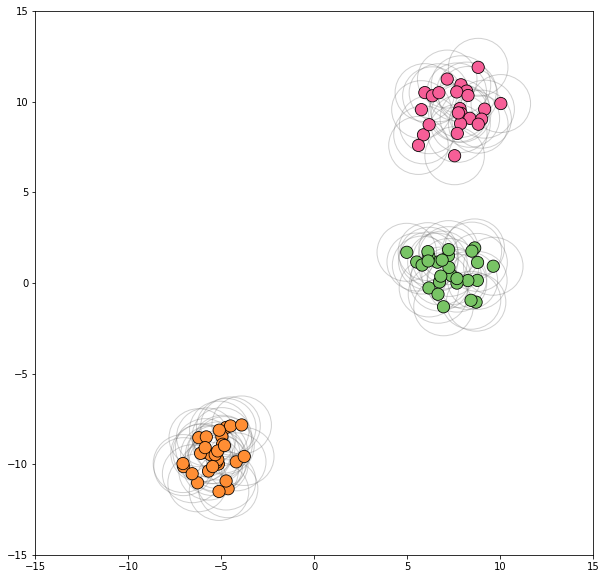

In [9]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)
#畫圖

In [10]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()
#change the type of dataset_2 and transpose it.

In [11]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)
#以 eps=1.3 跟 min_points = 5 去做 dbscan

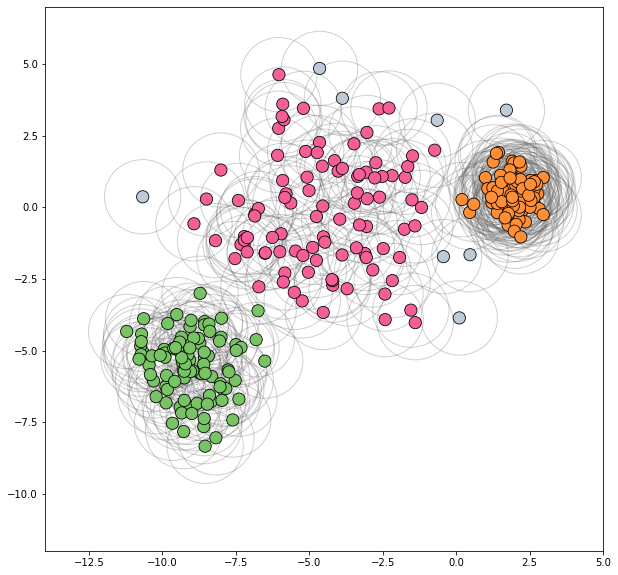

In [12]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
#畫圖

In [13]:
random.seed(777)
scat_X = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
scat_Y = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
#randomly creating 1000 points which is between -1000 to 1000
scat_X_Y_raw = np.stack((scat_X, scat_Y))
k = scat_X_Y_raw.reshape(1000,2)
#stack the scat_X and scat_Y and reshape it in order to calculate easily 
# You might need to do some reshape and stack here...

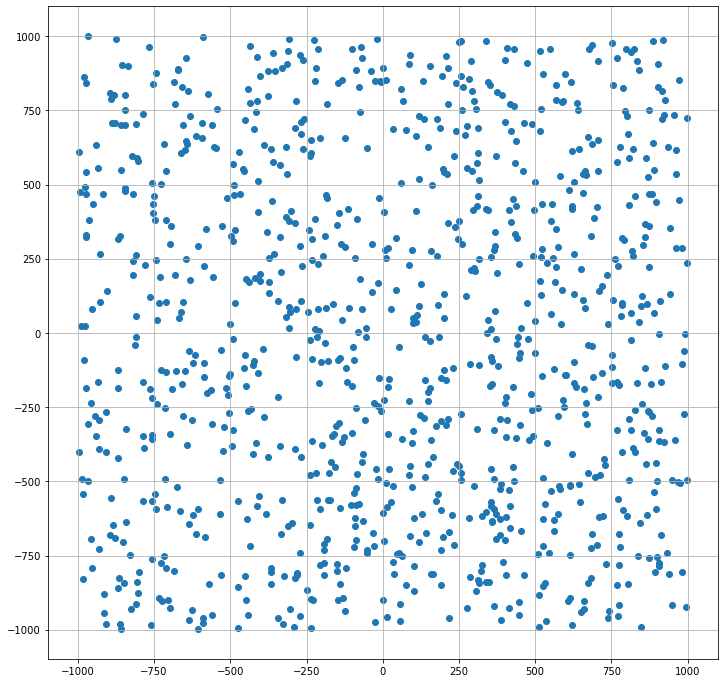

In [14]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.scatter(scat_X, scat_Y)
#draw the scatter plot
plt.grid()#格線
# Put the "X" and "Y" in the scatter plot function...
# How to make the ＂格線＂ of X and Y the same length...? Google might help!

In [15]:
def radius(ndarray, r):
    boolean_mask = []
    for i in range(1000):
        if ndarray[i][0]**2 + ndarray[i][1]**2 <= r**2:
            boolean_mask.append(i)
    return ndarray[boolean_mask]
#check if the point is in the given radius
#append the index into boolean_mask and return all points

In [16]:
scat_X_Y = radius(k, 1000)
#executing the function
print(scat_X_Y)

[[-531  -87]
 [ -88 -246]
 [ 178 -448]
 ...
 [ 697  595]
 [-164 -274]
 [ 848  320]]


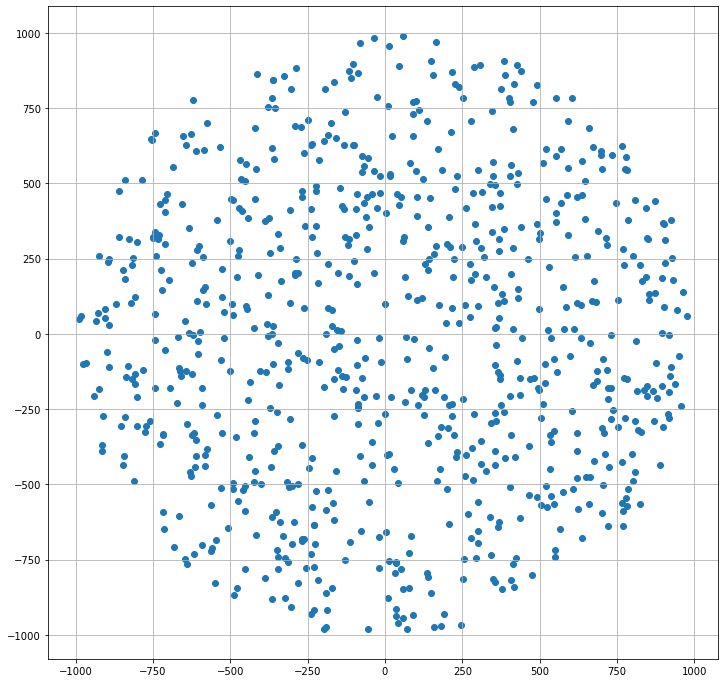

In [17]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.scatter(scat_X_Y[:,0],scat_X_Y[:,1])
plt.grid()
#draw the scatter plot 

In [18]:
dist_sq = np.full((len(scat_X_Y), len(scat_X_Y)), 0)
for i in range(len(scat_X_Y)):
    for j in range(len(scat_X_Y)):
        if i==j:
            continue
        else:
            dist_sq[i][j] = np.linalg.norm(scat_X_Y[i]-scat_X_Y[j])
print(dist_sq)
#create the matrix which represents the distance between two points 
#for example, dist_sq[0][1] represents the distance betwwen scat_X_Y[0] and scat_X_Y[1] 

[[   0  470  795 ... 1404  411 1437]
 [ 470    0  334 ... 1150   80 1093]
 [ 795  334    0 ... 1164  383 1019]
 ...
 [1404 1150 1164 ...    0 1223  313]
 [ 411   80  383 ... 1223    0 1173]
 [1437 1093 1019 ...  313 1173    0]]


In [19]:
nearest = np.copy(dist_sq)
for i in range(len(nearest)):
    index = np.argsort(nearest[i])
    nearest[i] = index
print(nearest)
#sort along the rows
#returns the indices of the sorted elements

[[  0 262 367 ... 357 601 439]
 [  1 147 245 ... 224 241 507]
 [  2 433   8 ... 183  18 297]
 ...
 [780 207 221 ... 283  40 184]
 [781  54   1 ... 241 507 458]
 [782  48 344 ...  30 607 482]]


In [20]:
def nearest_partition(dist_sq, K):
    for i in range(len(dist_sq)):
        index = np.argsort(dist_sq[i])
        dist_sq[i] = index
    return dist_sq[:,:K+1]
# Use a numpy method(function) to return the "K Nearest Neighbor"
#sort along the rows
#returns the top k+1 columns of dist_sq , which represents the k nearest neighbor of the point i

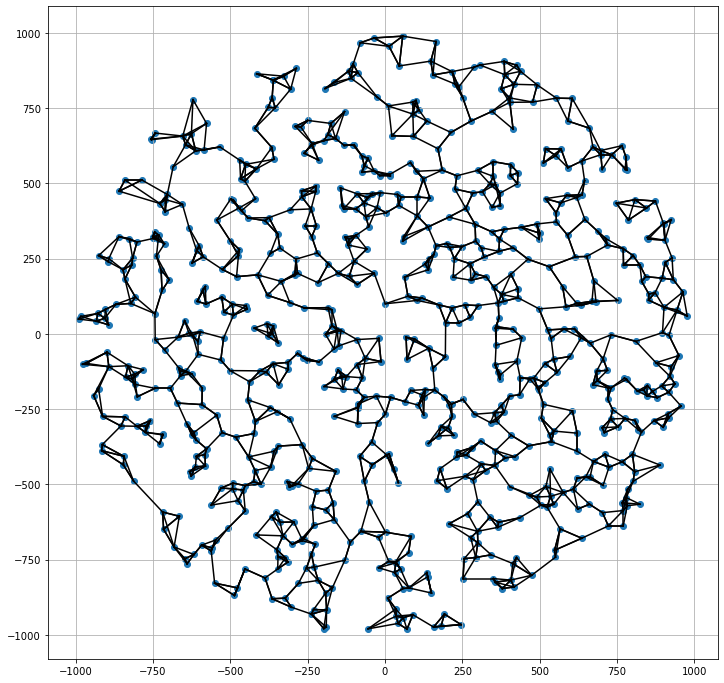

In [21]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.scatter(scat_X_Y[:,0],scat_X_Y[:,1])
#draw all points in the given radius
K = 3
KNN = nearest_partition(dist_sq, K)
for i in range(1,K+1):
    for j in range(len(KNN)):
        xvalue = [scat_X_Y[KNN[j][0],0],scat_X_Y[KNN[j][i],0]]
        yvalue = [scat_X_Y[KNN[j][0],1],scat_X_Y[KNN[j][i],1]]
        # draw lines from each point to its three nearest neighbors
        plt.plot(xvalue,yvalue,'k')#black lines
plt.grid()
#draw 格線